# 1: A quick use case for MICADO at the ELT


## A brief introduction into using ScopeSim to observe a cluster in the LMC

In [1]:
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import scopesim as sim
import scopesim_templates as sim_tp

# [Required for Readthedocs] Comment out this line if running locally
tmpdir = TemporaryDirectory()
sim.rc.__config__["!SIM.file.local_packages_path"] = tmpdir.name

Download the required instrument packages for an observation with MICADO at the ELT

In [2]:
sim.download_packages(["Armazones", "ELT", "MORFEO", "MICADO"])

['C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmpxhqx8_if\\Armazones.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmpxhqx8_if\\ELT.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmpxhqx8_if\\MORFEO.zip',
 'C:\\Users\\Kieran\\AppData\\Local\\Temp\\tmpxhqx8_if\\MICADO.zip']

Create a star cluster using the ``scopesim_templates`` package

In [3]:
cluster = sim_tp.stellar.clusters.cluster(mass=1000,         # Msun
                                          distance=50000,    # parsec
                                          core_radius=0.3,     # parsec
                                          seed=9002)

INFO - sample_imf: Setting maximum allowed mass to 1000
INFO - sample_imf: Loop 0 added 1.26e+03 Msun to previous total of 0.00e+00 Msun


Make the MICADO optical system model with ``OpticalTrain``. Observe the cluster ``Source`` object with the ``.observe()`` method and read out the MICADO detectors with ``.readout()``. 

The resulting FITS file can either be returned as an ``astropy.fits.HDUList`` object, or saved to disk using the optional ``filename`` parameter

In [4]:
micado = sim.OpticalTrain("MICADO")
micado.observe(cluster)
hdus = micado.readout()
# micado.readout(filename="TEST.fits")


Reason:  <class 'ValueError'> !OBS.instrument was not found in rc.__currsys__



Display the contents the first HDU

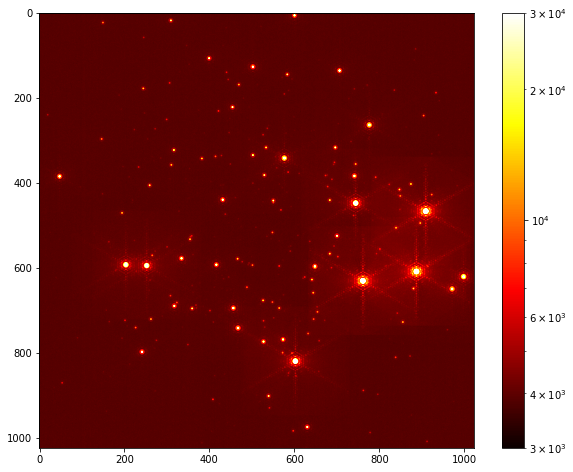

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(hdus[0][1].data, norm=LogNorm(vmax=3E4, vmin=3E3), cmap="hot")
plt.colorbar()

## TL;DR

```
import scopesim as sim
import scopesim_templates as sim_tp

sim.download_packages(["Armazones", "ELT", "MORFEO", "MICADO"])

cluster = sim_tp.stellar.clusters.cluster(mass=1000,         # Msun
                                          distance=50000,    # parsec
                                          core_radius=0.3,     # parsec
                                          seed=9002)

micado = sim.OpticalTrain("MICADO")
micado.observe(cluster)

hdus = micado.readout()
# micado.readout(filename="TEST.fits")
```